<a href="https://colab.research.google.com/github/zaira-ra/ENSF444_Project/blob/main/ENSF444Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Add some sort of introduction text]

In [ ]:
#pip install pandas numpy matplotlib seaborn scikit-learn jupyter


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [2]:
df = pd.read_csv("Superstore.csv", encoding='ISO-8859-1') 
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


EDA: Heatmap of column relations:

Text(0.5, 1.0, 'Column Relation Heatmap')

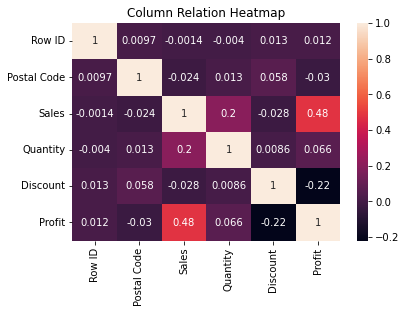

In [3]:
sns.heatmap(df.corr(), annot=True)
plt.title('Column Relation Heatmap')

Separate into feature matrix and target vector:

In [7]:
y = df['Profit'] #Target is profit
X = df.drop(columns=['Profit'])
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (9994, 20)
Shape of y: (9994,)


Preprocessing:

In [5]:
#Check for missing values in X:
print("Missing values in X:\n", X.isnull().sum())
#There are no missing values

Missing values in X:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
dtype: int64


In [6]:
#Check column data types:
print("Data types:\n", X.dtypes)

Data types:
 Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
dtype: object


Preprosessing: Drop unneeded columns

In [8]:
df.drop(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Country', 'Postal Code', 
           'Region', 'Product ID', 'Product Name'], axis=1, inplace=True)
df.columns


Index(['Order Date', 'Segment', 'City', 'State', 'Category', 'Sub-Category',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Encode categorical features:

In [ ]:
from sklearn.preprocessing import LabelEncoder
#find how we did it, idk rn